# GECCO2019 - Bi-objective Traveling Thief Problem 

This worksheet contains the evaluation for the competition at **GECCO2019**. 
After having received all submissions, the evaluation will be done as follows:

After having received all submissions, the evaluation will be done as follows:

For each of the nine test problems

a) We will merge the solution sets of all submissions and extract the non-dominated set.

b) The minimum in time and the maximum in profit will be used to determine the reference point.

c) With respect to this reference point the quality of each submission will be measured using the hypervolume indicator.

d) We will sort the submissions according to the achieved hypervolume in descending order and give points as follows: 1st place -> 3 points, 2nd place -> 2 points, 3rd place -> 1 point.


By adding up the points for each submission we will create the overall ranking. Please note, that depending on the number of submissions the evaluation might need to be reconsidered.

The validation has already been done using the Java code. Which means that each submission has the correct number of solutions (less than the maximum specfied at the competition homepage).


## Imports necessary for the evaluation

## Participants and Problems

In [1]:
# the result folder as a path
from non_dominated_sorting import fast_non_dominated_sort
import os.path
import numpy as np
import matplotlib.pyplot as plt
from hv import Hypervolume
from normalization import normalize
import pandas as pd

folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "evaluations/results")

# all submissions received
participants = [   
                    "PN-PHN",
                    "PN-DRLMOA",
                    "AM-DRLMOA",
                    "AM-PHN"
    
               ]

participant_name_dict = {
    "PN-PHN":"PN-PHN",
    "AM-PHN":"AM-PHN",
#     "mpn-phn-eil":"PN-PHN",
    "PN-DRLMOA":"PN-DRLMOA",
    "AM-DRLMOA":"AM-DRLMOA",
#     "att-phn-eil":"AM-PHN"
}

problems = [
#                     "ch150_n1490_bounded-strongly-corr_01",
# "ch150_n1490_bounded-strongly-corr_02",
# "ch150_n1490_bounded-strongly-corr_03",
# "ch150_n1490_bounded-strongly-corr_04",
# "ch150_n1490_bounded-strongly-corr_05",
# "ch150_n1490_bounded-strongly-corr_06",
# "ch150_n1490_bounded-strongly-corr_07",
# "ch150_n1490_bounded-strongly-corr_08",
# "ch150_n1490_bounded-strongly-corr_09",
# "ch150_n1490_bounded-strongly-corr_10",
# "ch150_n1490_uncorr-similar-weights_01",
# "ch150_n1490_uncorr-similar-weights_02",
# "ch150_n1490_uncorr-similar-weights_03",
# "ch150_n1490_uncorr-similar-weights_04",
# "ch150_n1490_uncorr-similar-weights_05",
# "ch150_n1490_uncorr-similar-weights_06",
# "ch150_n1490_uncorr-similar-weights_07",
# "ch150_n1490_uncorr-similar-weights_08",
# "ch150_n1490_uncorr-similar-weights_09",
# "ch150_n1490_uncorr-similar-weights_10",
# "ch150_n1490_uncorr_01",
# "ch150_n1490_uncorr_02",
# "ch150_n1490_uncorr_03",
# "ch150_n1490_uncorr_04",
# "ch150_n1490_uncorr_05",
# "ch150_n1490_uncorr_06",
# "ch150_n1490_uncorr_07",
# "ch150_n1490_uncorr_08",
# "ch150_n1490_uncorr_09",
# "ch150_n1490_uncorr_10",
# "ch150_n149_bounded-strongly-corr_01",
# "ch150_n149_bounded-strongly-corr_02",
# "ch150_n149_bounded-strongly-corr_03",
# "ch150_n149_bounded-strongly-corr_04",
# "ch150_n149_bounded-strongly-corr_05",
# "ch150_n149_bounded-strongly-corr_06",
# "ch150_n149_bounded-strongly-corr_07",
# "ch150_n149_bounded-strongly-corr_08",
# "ch150_n149_bounded-strongly-corr_09",
# "ch150_n149_bounded-strongly-corr_10",
# "ch150_n149_uncorr-similar-weights_01",
# "ch150_n149_uncorr-similar-weights_02",
# "ch150_n149_uncorr-similar-weights_03",
# "ch150_n149_uncorr-similar-weights_04",
# "ch150_n149_uncorr-similar-weights_05",
# "ch150_n149_uncorr-similar-weights_06",
# "ch150_n149_uncorr-similar-weights_07",
# "ch150_n149_uncorr-similar-weights_08",
# "ch150_n149_uncorr-similar-weights_09",
# "ch150_n149_uncorr-similar-weights_10",
# "ch150_n149_uncorr_01",
# "ch150_n149_uncorr_02",
# "ch150_n149_uncorr_03",
# "ch150_n149_uncorr_04",
# "ch150_n149_uncorr_05",
# "ch150_n149_uncorr_06",
# "ch150_n149_uncorr_07",
# "ch150_n149_uncorr_08",
# "ch150_n149_uncorr_09",
# "ch150_n149_uncorr_10",
# "ch150_n447_bounded-strongly-corr_01",
# "ch150_n447_bounded-strongly-corr_02",
# "ch150_n447_bounded-strongly-corr_03",
# "ch150_n447_bounded-strongly-corr_04",
# "ch150_n447_bounded-strongly-corr_05",
# "ch150_n447_bounded-strongly-corr_06",
# "ch150_n447_bounded-strongly-corr_07",
# "ch150_n447_bounded-strongly-corr_08",
# "ch150_n447_bounded-strongly-corr_09",
# "ch150_n447_bounded-strongly-corr_10",
# "ch150_n447_uncorr-similar-weights_01",
# "ch150_n447_uncorr-similar-weights_02",
# "ch150_n447_uncorr-similar-weights_03",
# "ch150_n447_uncorr-similar-weights_04",
# "ch150_n447_uncorr-similar-weights_05",
# "ch150_n447_uncorr-similar-weights_06",
# "ch150_n447_uncorr-similar-weights_07",
# "ch150_n447_uncorr-similar-weights_08",
# "ch150_n447_uncorr-similar-weights_09",
# "ch150_n447_uncorr-similar-weights_10",
# "ch150_n447_uncorr_01",
# "ch150_n447_uncorr_02",
# "ch150_n447_uncorr_03",
# "ch150_n447_uncorr_04",
# "ch150_n447_uncorr_05",
# "ch150_n447_uncorr_06",
# "ch150_n447_uncorr_07",
# "ch150_n447_uncorr_08",
# "ch150_n447_uncorr_09",
# "ch150_n447_uncorr_10",
# "ch150_n745_bounded-strongly-corr_01",
# "ch150_n745_bounded-strongly-corr_02",
# "ch150_n745_bounded-strongly-corr_03",
# "ch150_n745_bounded-strongly-corr_04",
# "ch150_n745_bounded-strongly-corr_05",
# "ch150_n745_bounded-strongly-corr_06",
# "ch150_n745_bounded-strongly-corr_07",
# "ch150_n745_bounded-strongly-corr_08",
# "ch150_n745_bounded-strongly-corr_09",
# "ch150_n745_bounded-strongly-corr_10",
# "ch150_n745_uncorr-similar-weights_01",
# "ch150_n745_uncorr-similar-weights_02",
# "ch150_n745_uncorr-similar-weights_03",
# "ch150_n745_uncorr-similar-weights_04",
# "ch150_n745_uncorr-similar-weights_05",
# "ch150_n745_uncorr-similar-weights_06",
# "ch150_n745_uncorr-similar-weights_07",
# "ch150_n745_uncorr-similar-weights_08",
# "ch150_n745_uncorr-similar-weights_09",
# "ch150_n745_uncorr-similar-weights_10",
# "ch150_n745_uncorr_01",
# "ch150_n745_uncorr_02",
# "ch150_n745_uncorr_03",
# "ch150_n745_uncorr_04",
# "ch150_n745_uncorr_05",
# "ch150_n745_uncorr_06",
# "ch150_n745_uncorr_07",
# "ch150_n745_uncorr_08",
# "ch150_n745_uncorr_09",
# "ch150_n745_uncorr_10",
"eil76_n225_bounded-strongly-corr_01",
"eil76_n225_bounded-strongly-corr_02",
"eil76_n225_bounded-strongly-corr_03",
"eil76_n225_bounded-strongly-corr_04",
"eil76_n225_bounded-strongly-corr_05",
"eil76_n225_bounded-strongly-corr_06",
"eil76_n225_bounded-strongly-corr_07",
"eil76_n225_bounded-strongly-corr_08",
"eil76_n225_bounded-strongly-corr_09",
"eil76_n225_bounded-strongly-corr_10",
"eil76_n225_uncorr-similar-weights_01",
"eil76_n225_uncorr-similar-weights_02",
"eil76_n225_uncorr-similar-weights_03",
"eil76_n225_uncorr-similar-weights_04",
"eil76_n225_uncorr-similar-weights_05",
"eil76_n225_uncorr-similar-weights_06",
"eil76_n225_uncorr-similar-weights_07",
"eil76_n225_uncorr-similar-weights_08",
"eil76_n225_uncorr-similar-weights_09",
"eil76_n225_uncorr-similar-weights_10",
"eil76_n225_uncorr_01",
"eil76_n225_uncorr_02",
"eil76_n225_uncorr_03",
"eil76_n225_uncorr_04",
"eil76_n225_uncorr_05",
"eil76_n225_uncorr_06",
"eil76_n225_uncorr_07",
"eil76_n225_uncorr_08",
"eil76_n225_uncorr_09",
"eil76_n225_uncorr_10",
"eil76_n375_bounded-strongly-corr_01",
"eil76_n375_bounded-strongly-corr_02",
"eil76_n375_bounded-strongly-corr_03",
"eil76_n375_bounded-strongly-corr_04",
"eil76_n375_bounded-strongly-corr_05",
"eil76_n375_bounded-strongly-corr_06",
"eil76_n375_bounded-strongly-corr_07",
"eil76_n375_bounded-strongly-corr_08",
"eil76_n375_bounded-strongly-corr_09",
"eil76_n375_bounded-strongly-corr_10",
"eil76_n375_uncorr-similar-weights_01",
"eil76_n375_uncorr-similar-weights_02",
"eil76_n375_uncorr-similar-weights_03",
"eil76_n375_uncorr-similar-weights_04",
"eil76_n375_uncorr-similar-weights_05",
"eil76_n375_uncorr-similar-weights_06",
"eil76_n375_uncorr-similar-weights_07",
"eil76_n375_uncorr-similar-weights_08",
"eil76_n375_uncorr-similar-weights_09",
"eil76_n375_uncorr-similar-weights_10",
"eil76_n375_uncorr_01",
"eil76_n375_uncorr_02",
"eil76_n375_uncorr_03",
"eil76_n375_uncorr_04",
"eil76_n375_uncorr_05",
"eil76_n375_uncorr_06",
"eil76_n375_uncorr_07",
"eil76_n375_uncorr_08",
"eil76_n375_uncorr_09",
"eil76_n375_uncorr_10",
"eil76_n750_bounded-strongly-corr_01",
"eil76_n750_bounded-strongly-corr_02",
"eil76_n750_bounded-strongly-corr_03",
"eil76_n750_bounded-strongly-corr_04",
"eil76_n750_bounded-strongly-corr_05",
"eil76_n750_bounded-strongly-corr_06",
"eil76_n750_bounded-strongly-corr_07",
"eil76_n750_bounded-strongly-corr_08",
"eil76_n750_bounded-strongly-corr_09",
"eil76_n750_bounded-strongly-corr_10",
"eil76_n750_uncorr-similar-weights_01",
"eil76_n750_uncorr-similar-weights_02",
"eil76_n750_uncorr-similar-weights_03",
"eil76_n750_uncorr-similar-weights_04",
"eil76_n750_uncorr-similar-weights_05",
"eil76_n750_uncorr-similar-weights_06",
"eil76_n750_uncorr-similar-weights_07",
"eil76_n750_uncorr-similar-weights_08",
"eil76_n750_uncorr-similar-weights_09",
"eil76_n750_uncorr-similar-weights_10",
"eil76_n750_uncorr_01",
"eil76_n750_uncorr_02",
"eil76_n750_uncorr_03",
"eil76_n750_uncorr_04",
"eil76_n750_uncorr_05",
"eil76_n750_uncorr_06",
"eil76_n750_uncorr_07",
"eil76_n750_uncorr_08",
"eil76_n750_uncorr_09",
"eil76_n750_uncorr_10",
"eil76_n75_bounded-strongly-corr_01",
"eil76_n75_bounded-strongly-corr_02",
"eil76_n75_bounded-strongly-corr_03",
"eil76_n75_bounded-strongly-corr_04",
"eil76_n75_bounded-strongly-corr_05",
"eil76_n75_bounded-strongly-corr_06",
"eil76_n75_bounded-strongly-corr_07",
"eil76_n75_bounded-strongly-corr_08",
"eil76_n75_bounded-strongly-corr_09",
"eil76_n75_bounded-strongly-corr_10",
"eil76_n75_uncorr-similar-weights_01",
"eil76_n75_uncorr-similar-weights_02",
"eil76_n75_uncorr-similar-weights_03",
"eil76_n75_uncorr-similar-weights_04",
"eil76_n75_uncorr-similar-weights_05",
"eil76_n75_uncorr-similar-weights_06",
"eil76_n75_uncorr-similar-weights_07",
"eil76_n75_uncorr-similar-weights_08",
"eil76_n75_uncorr-similar-weights_09",
"eil76_n75_uncorr-similar-weights_10",
"eil76_n75_uncorr_01",
"eil76_n75_uncorr_02",
"eil76_n75_uncorr_03",
"eil76_n75_uncorr_04",
"eil76_n75_uncorr_05",
"eil76_n75_uncorr_06",
"eil76_n75_uncorr_07",
"eil76_n75_uncorr_08",
"eil76_n75_uncorr_09",
"eil76_n75_uncorr_10",
#     "lin105_n1040_bounded-strongly-corr_01",
#     "lin105_n1040_bounded-strongly-corr_02",
#     "lin105_n1040_bounded-strongly-corr_03",
#     "lin105_n1040_bounded-strongly-corr_04",
#     "lin105_n1040_bounded-strongly-corr_05",
#     "lin105_n1040_bounded-strongly-corr_06",
#     "lin105_n1040_bounded-strongly-corr_07",
#     "lin105_n1040_bounded-strongly-corr_08",
#     "lin105_n1040_bounded-strongly-corr_09",
#     "lin105_n1040_bounded-strongly-corr_10",
#     "lin105_n1040_uncorr-similar-weights_01",
#     "lin105_n1040_uncorr-similar-weights_02",
#     "lin105_n1040_uncorr-similar-weights_03",
#     "lin105_n1040_uncorr-similar-weights_04",
#     "lin105_n1040_uncorr-similar-weights_05",
#     "lin105_n1040_uncorr-similar-weights_06",
#     "lin105_n1040_uncorr-similar-weights_07",
#     "lin105_n1040_uncorr-similar-weights_08",
#     "lin105_n1040_uncorr-similar-weights_09",
#     "lin105_n1040_uncorr-similar-weights_10",
#     "lin105_n1040_uncorr_01",
#     "lin105_n1040_uncorr_02",
#     "lin105_n1040_uncorr_03",
#     "lin105_n1040_uncorr_04",
#     "lin105_n1040_uncorr_05",
#     "lin105_n1040_uncorr_06",
#     "lin105_n1040_uncorr_07",
#     "lin105_n1040_uncorr_08",
#     "lin105_n1040_uncorr_09",
#     "lin105_n1040_uncorr_10",
#     "lin105_n104_bounded-strongly-corr_01",
#     "lin105_n104_bounded-strongly-corr_02",
#     "lin105_n104_bounded-strongly-corr_03",
#     "lin105_n104_bounded-strongly-corr_04",
#     "lin105_n104_bounded-strongly-corr_05",
#     "lin105_n104_bounded-strongly-corr_06",
#     "lin105_n104_bounded-strongly-corr_07",
#     "lin105_n104_bounded-strongly-corr_08",
#     "lin105_n104_bounded-strongly-corr_09",
#     "lin105_n104_bounded-strongly-corr_10",
#     "lin105_n104_uncorr-similar-weights_01",
#     "lin105_n104_uncorr-similar-weights_02",
#     "lin105_n104_uncorr-similar-weights_03",
#     "lin105_n104_uncorr-similar-weights_04",
#     "lin105_n104_uncorr-similar-weights_05",
#     "lin105_n104_uncorr-similar-weights_06",
#     "lin105_n104_uncorr-similar-weights_07",
#     "lin105_n104_uncorr-similar-weights_08",
#     "lin105_n104_uncorr-similar-weights_09",
#     "lin105_n104_uncorr-similar-weights_10",
#     "lin105_n104_uncorr_01",
#     "lin105_n104_uncorr_02",
#     "lin105_n104_uncorr_03",
#     "lin105_n104_uncorr_04",
#     "lin105_n104_uncorr_05",
#     "lin105_n104_uncorr_06",
#     "lin105_n104_uncorr_07",
#     "lin105_n104_uncorr_08",
#     "lin105_n104_uncorr_09",
#     "lin105_n104_uncorr_10",
#     "lin105_n312_bounded-strongly-corr_01",
#     "lin105_n312_bounded-strongly-corr_02",
#     "lin105_n312_bounded-strongly-corr_03",
#     "lin105_n312_bounded-strongly-corr_04",
#     "lin105_n312_bounded-strongly-corr_05",
#     "lin105_n312_bounded-strongly-corr_06",
#     "lin105_n312_bounded-strongly-corr_07",
#     "lin105_n312_bounded-strongly-corr_08",
#     "lin105_n312_bounded-strongly-corr_09",
#     "lin105_n312_bounded-strongly-corr_10",
#     "lin105_n312_uncorr-similar-weights_01",
#     "lin105_n312_uncorr-similar-weights_02",
#     "lin105_n312_uncorr-similar-weights_03",
#     "lin105_n312_uncorr-similar-weights_04",
#     "lin105_n312_uncorr-similar-weights_05",
#     "lin105_n312_uncorr-similar-weights_06",
#     "lin105_n312_uncorr-similar-weights_07",
#     "lin105_n312_uncorr-similar-weights_08",
#     "lin105_n312_uncorr-similar-weights_09",
#     "lin105_n312_uncorr-similar-weights_10",
#     "lin105_n312_uncorr_01",
#     "lin105_n312_uncorr_02",
#     "lin105_n312_uncorr_03",
#     "lin105_n312_uncorr_04",
#     "lin105_n312_uncorr_05",
#     "lin105_n312_uncorr_06",
#     "lin105_n312_uncorr_07",
#     "lin105_n312_uncorr_08",
#     "lin105_n312_uncorr_09",
#     "lin105_n312_uncorr_10",
#     "lin105_n520_bounded-strongly-corr_01",
#     "lin105_n520_bounded-strongly-corr_02",
#     "lin105_n520_bounded-strongly-corr_03",
#     "lin105_n520_bounded-strongly-corr_04",
#     "lin105_n520_bounded-strongly-corr_05",
#     "lin105_n520_bounded-strongly-corr_06",
#     "lin105_n520_bounded-strongly-corr_07",
#     "lin105_n520_bounded-strongly-corr_08",
#     "lin105_n520_bounded-strongly-corr_09",
#     "lin105_n520_bounded-strongly-corr_10",
#     "lin105_n520_uncorr-similar-weights_01",
#     "lin105_n520_uncorr-similar-weights_02",
#     "lin105_n520_uncorr-similar-weights_03",
#     "lin105_n520_uncorr-similar-weights_04",
#     "lin105_n520_uncorr-similar-weights_05",
#     "lin105_n520_uncorr-similar-weights_06",
#     "lin105_n520_uncorr-similar-weights_07",
#     "lin105_n520_uncorr-similar-weights_08",
#     "lin105_n520_uncorr-similar-weights_09",
#     "lin105_n520_uncorr-similar-weights_10",
#     "lin105_n520_uncorr_01",
#     "lin105_n520_uncorr_02",
#     "lin105_n520_uncorr_03",
#     "lin105_n520_uncorr_04",
#     "lin105_n520_uncorr_05",
#     "lin105_n520_uncorr_06",
#     "lin105_n520_uncorr_07",
#     "lin105_n520_uncorr_08",
#     "lin105_n520_uncorr_09",
#     "lin105_n520_uncorr_10",
           ]

## Load data

Load all data from the submission directory and convert it to a minimization problem.
The data dictionary contains all submissions of a participant. The set of non-dominated points
is converted to a minimization problem by multiplying the profit times -1.

In [2]:

data = {}

for problem in problems:
    _entry = {}
    for participant in participants:
        
        # check for the corresponding file
        fname = "%s_%s.f" % (participant, problem)   
        path_to_file = os.path.join(folder,participant, fname)
        
        # in case the wrong delimiter was used
        if not os.path.isfile(path_to_file):
            fname = "%s_%s.f" % (participant, problem.replace("_", "-"))
            path_to_file = os.path.join(folder,participant, fname)
         
        # load the values in the objective space - first column is time, second profit
        _F = np.loadtxt(path_to_file)
        
        # modify it to a min-min problem by multiplying the profit by -1
        _entry[participant] = _F * [1, -1]
        
    data[problem] = _entry




## Plot the results

To get an idea how the submissions look like, we are plotting the results first.
Note that the plots are not normalized yet and the ranges of both object vary.

In [4]:
import matplotlib.colors as mcolors
colors_list = []
color_name_list = [
    ['blue','lightblue'],
    ['lightblue','blue'],
    ['lightblue','blue'],
  ['blue','lightblue'],
#       ['mistyrose','red'],
#     ['lightgreen','green'],
#     ['lemonchiffon','orange']
]
for i in range(4):
    light_color = mcolors.CSS4_COLORS[color_name_list[i][0]]
    dark_color = mcolors.CSS4_COLORS[color_name_list[i][1]]
    colors = np.vstack((mcolors.to_rgba(light_color), mcolors.to_rgba(dark_color)))
    colors_list += [colors]
marker_list = ["o","v","P","*"]

In [ ]:
print("Plot the results. If points are not shown there are not in the non-dominated region.")

import matplotlib.cm as cm
import matplotlib.colors as mcolors

# cmap = cm.get_cmap('tab10')

nd_size_df = pd.DataFrame()
nd_size_df["algorithms"] = participants
for idx, problem in enumerate(problems):
    nd_size_list = []
    plt.figure(figsize=(5, 4))
    for k, participant in enumerate(participants):

        _F = data[problem][participant]
        if len(_F.shape) == 1:
            _F = _F[np.newaxis, :]
        participant_label = participant_name_dict[participant]
#             participant_label = participant
        I = fast_non_dominated_sort(_F)[0]
        nondom_F = _F[I]
        nd_size_list += [len(nondom_F)]
        gradient = np.linspace(0,1,len(_F))
        my_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors_list[k], N=len(_F))
#         print(len(_F))
        plt.scatter(_F[:,0], _F[:,1], c=gradient, edgecolors='black', linewidths=0.1, cmap=my_cmap, label=participant_label, marker=marker_list[k])
#         plt.scatter(nondom_F[:,0], nondom_F[:,1], c=gradient[I], edgecolors='black', linewidths=0.1, cmap=my_cmap, label=participant_label, marker=marker_list[k])
    
        #       plt.scatter(_F[:,0], _F[:,1], label=participant_label, s=10, facecolors='none', edgecolors=cmap(k))

    nd_size_df[problem] = nd_size_list
    _all = np.row_stack([data[problem][participant] for participant in participants])
    I = fast_non_dominated_sort(_all)[0]
    _non_dom = _all[I]
    
#     _min = _all.min(axis=0)
#     _max = _all.max(axis=0)
    _min = _non_dom.min(axis=0)
    _max = _non_dom.max(axis=0)
    _range = _max - _min
        
    print("=" * 60)
    print(problem)
    print("=" * 60)
    plt.xlabel("total travel time")
    plt.ylabel("negative total profit")
    plt.xlim(_min[0] - 0.05 * _range[0], _max[0] + 0.05 * _range[0])
    plt.ylim(_min[1] - 0.05 * _range[1], _max[1] + 0.05 * _range[1])
    if idx == 0:
        plt.legend()
    plt.gcf()
    plt.savefig("lambda_solution_plot_"+problem+".jpg", dpi=200, bbox_inches='tight', )
    plt.show()

# nd_size_df.to_csv("nondom_solutions_num.csv")

Plot the results. If points are not shown there are not in the non-dominated region.
PN-PHN


<Figure size 500x400 with 0 Axes>

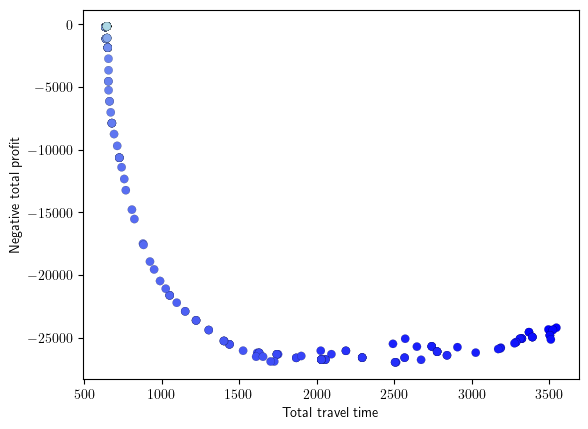

PN-DRLMOA


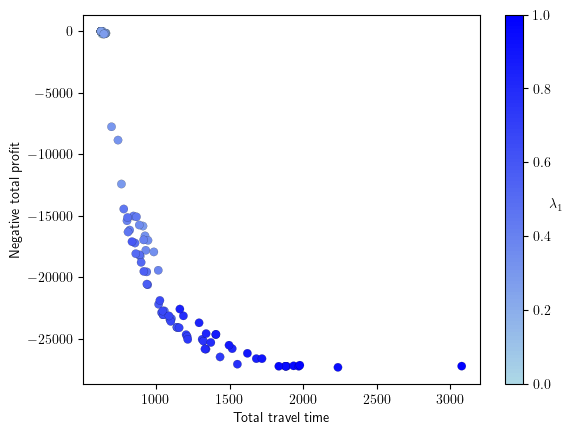

AM-DRLMOA


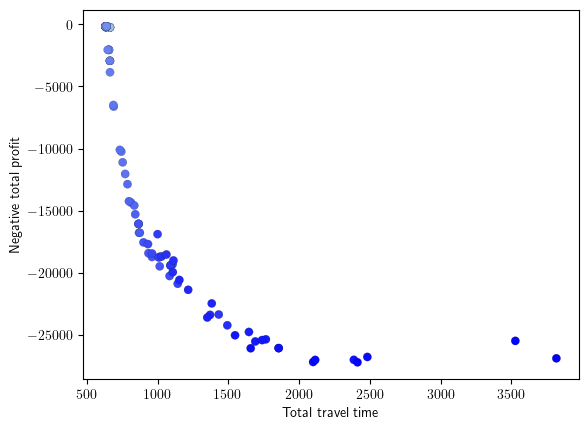

AM-PHN


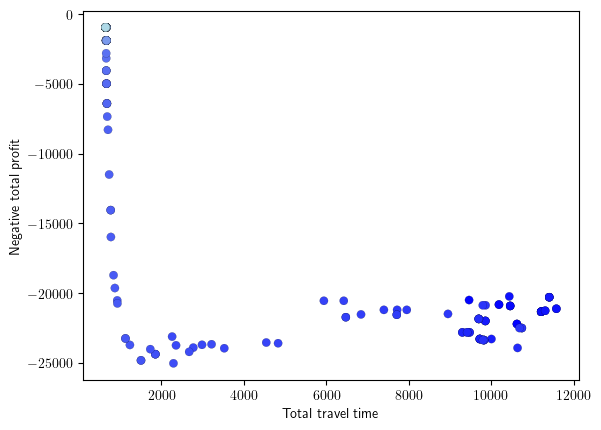

In [25]:
print("Plot the results. If points are not shown there are not in the non-dominated region.")

import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

# cmap = cm.get_cmap('tab10')

nd_size_df = pd.DataFrame()
nd_size_df["algorithms"] = participants
nd_size_list = []
problem = "eil76_n75_uncorr-similar-weights_05"
plt.figure(figsize=(5, 4))
for k, participant in enumerate(participants):
    fig, ax = plt.subplots()
    _F = data[problem][participant]
    if len(_F.shape) == 1:
        _F = _F[np.newaxis, :]
    participant_label = participant_name_dict[participant]
#             participant_label = participant
    I = fast_non_dominated_sort(_F)[0]
    nondom_F = _F[I]
    gradient = np.linspace(0,1,len(_F))
    my_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors_list[k], N=len(_F))
#         print(len(_F))
    points = ax.scatter(_F[:,0], _F[:,1], c=gradient, edgecolors='black', linewidths=0.1, cmap=my_cmap, label=participant_label)
#         plt.scatter(nondom_F[:,0], nondom_F[:,1], c=gradient[I], edgecolors='black', linewidths=0.1, cmap=my_cmap, label=participant_label, marker=marker_list[k])

    #       plt.scatter(_F[:,0], _F[:,1], label=participant_label, s=10, facecolors='none', edgecolors=cmap(k))

#     nd_size_df[problem] = nd_size_list
#     _all = np.row_stack([data[problem][participant] for participant in participants])
#     I = fast_non_dominated_sort(_all)[0]
#     _non_dom = _all[I]

#     _min = _all.min(axis=0)
#     _max = _all.max(axis=0)
#     _min = _non_dom.min(axis=0)
#     _max = _non_dom.max(axis=0)
#     _range = _max - _min

#     print("=" * 60)
#     print(problem)
#     print("=" * 60)
    ax.set_xlabel("Total travel time")
    ax.set_ylabel("Negative total profit")
    if k==1:
        cbar = fig.colorbar(points)
        cbar.set_label(r'$\lambda_1$', rotation=0)
#     plt.xlim(_min[0] - 0.05 * _range[0], _max[0] + 0.05 * _range[0])
#     plt.ylim(_min[1] - 0.05 * _range[1], _max[1] + 0.05 * _range[1])
#     if idx == 0:
#         plt.legend()
    print(participant)
    plt.gcf()
    plt.savefig("lambda_solution_plot_"+problem+"_"+participant+".jpg", dpi=200, bbox_inches='tight')
    plt.show()

## Find the reference non-dominated set for each test instance

For each problem we merge the submissions to a new population and filter out the non-dominated solutions. Then, we take the minimum and the maximum of this set as the ideal and nadir point the normalize the results.

In [21]:

ideal_point = {}
nadir_point = {}
ndf = {}

for problem in problems:
    
    # the merged non-dominated solutions for the specific problem
    M = []
    for participant in participants:    
        _F = data[problem][participant]
        M.append(_F)
        
    M = np.vstack(M)    
    I = fast_non_dominated_sort(M)[0]
    M = M[I, :]
    
    ideal_point[problem] = np.min(M, axis=0)
    nadir_point[problem] = np.max(M, axis=0)
    ndf[problem] = M
    
    

In the following for each problem the non-dominated set of solutions is first normalized using the boundaries and hypervolume is calculated.

In [22]:
results = []

for problem in problems:
    
    z = ideal_point[problem]
    z_nad = nadir_point[problem]
 
    for participant in participants:    
        _F = data[problem][participant]
        _N = normalize(_F, z, z_nad)
        _hv = Hypervolume(np.array([1,1])).calc(_N)
        results.append({'problem' : problem, 'participant' : participant, 'hv' : _hv})
        
df = pd.DataFrame(results, columns=["problem", "participant", "hv"])


In [23]:
print(df.to_csv("all_hv.csv"))

for problem in problems:

    print("=" * 60)
    print(problem)
    print("=" * 60)
    
    _df = df[df["problem"] == problem].copy()
    _df.sort_values("hv", ascending=False, inplace=True)
    _df.reset_index(drop=True, inplace=True)
    print(_df)

None
ch150_n1490_bounded-strongly-corr_01
                                problem     participant        hv
0  ch150_n1490_bounded-strongly-corr_01    nds-brkga_bi  0.930748
1  ch150_n1490_bounded-strongly-corr_01  att-drlmoa-eil  0.855762
2  ch150_n1490_bounded-strongly-corr_01     mpn-phn-eil  0.834439
3  ch150_n1490_bounded-strongly-corr_01       mpn-r1nes  0.830419
4  ch150_n1490_bounded-strongly-corr_01         mpn-eil  0.829570
5  ch150_n1490_bounded-strongly-corr_01   att-r1nes-eil  0.772392
6  ch150_n1490_bounded-strongly-corr_01     att-phn-eil  0.482718
ch150_n1490_bounded-strongly-corr_02
                                problem     participant        hv
0  ch150_n1490_bounded-strongly-corr_02    nds-brkga_bi  0.929519
1  ch150_n1490_bounded-strongly-corr_02       mpn-r1nes  0.876436
2  ch150_n1490_bounded-strongly-corr_02     mpn-phn-eil  0.852234
3  ch150_n1490_bounded-strongly-corr_02   att-r1nes-eil  0.813156
4  ch150_n1490_bounded-strongly-corr_02  att-drlmoa-eil  0.8054

                problem     participant        hv
0  ch150_n447_uncorr_01    nds-brkga_bi  0.889927
1  ch150_n447_uncorr_01  att-drlmoa-eil  0.820395
2  ch150_n447_uncorr_01         mpn-eil  0.773348
3  ch150_n447_uncorr_01     mpn-phn-eil  0.691304
4  ch150_n447_uncorr_01       mpn-r1nes  0.662403
5  ch150_n447_uncorr_01   att-r1nes-eil  0.581125
6  ch150_n447_uncorr_01     att-phn-eil  0.105415
ch150_n447_uncorr_02
                problem     participant        hv
0  ch150_n447_uncorr_02    nds-brkga_bi  0.889504
1  ch150_n447_uncorr_02         mpn-eil  0.793516
2  ch150_n447_uncorr_02  att-drlmoa-eil  0.738262
3  ch150_n447_uncorr_02     mpn-phn-eil  0.728734
4  ch150_n447_uncorr_02   att-r1nes-eil  0.721279
5  ch150_n447_uncorr_02       mpn-r1nes  0.693135
6  ch150_n447_uncorr_02     att-phn-eil  0.135205
ch150_n447_uncorr_03
                problem     participant        hv
0  ch150_n447_uncorr_03    nds-brkga_bi  0.891654
1  ch150_n447_uncorr_03         mpn-eil  0.800702
2  ch150

                               problem     participant        hv
0  eil76_n375_bounded-strongly-corr_04    nds-brkga_bi  0.912511
1  eil76_n375_bounded-strongly-corr_04         mpn-eil  0.907919
2  eil76_n375_bounded-strongly-corr_04  att-drlmoa-eil  0.907128
3  eil76_n375_bounded-strongly-corr_04       mpn-r1nes  0.901734
4  eil76_n375_bounded-strongly-corr_04     mpn-phn-eil  0.892738
5  eil76_n375_bounded-strongly-corr_04   att-r1nes-eil  0.868560
6  eil76_n375_bounded-strongly-corr_04     att-phn-eil  0.664474
eil76_n375_bounded-strongly-corr_05
                               problem     participant        hv
0  eil76_n375_bounded-strongly-corr_05         mpn-eil  0.911848
1  eil76_n375_bounded-strongly-corr_05  att-drlmoa-eil  0.911673
2  eil76_n375_bounded-strongly-corr_05       mpn-r1nes  0.910072
3  eil76_n375_bounded-strongly-corr_05    nds-brkga_bi  0.901312
4  eil76_n375_bounded-strongly-corr_05     mpn-phn-eil  0.893795
5  eil76_n375_bounded-strongly-corr_05   att-r1nes-eil

                               problem     participant        hv
0  eil76_n75_uncorr-similar-weights_10    nds-brkga_bi  0.973659
1  eil76_n75_uncorr-similar-weights_10         mpn-eil  0.940864
2  eil76_n75_uncorr-similar-weights_10       mpn-r1nes  0.932997
3  eil76_n75_uncorr-similar-weights_10  att-drlmoa-eil  0.931735
4  eil76_n75_uncorr-similar-weights_10   att-r1nes-eil  0.913474
5  eil76_n75_uncorr-similar-weights_10     mpn-phn-eil  0.894215
6  eil76_n75_uncorr-similar-weights_10     att-phn-eil  0.866007
eil76_n75_uncorr_01
               problem     participant        hv
0  eil76_n75_uncorr_01    nds-brkga_bi  0.834718
1  eil76_n75_uncorr_01         mpn-eil  0.622037
2  eil76_n75_uncorr_01       mpn-r1nes  0.610874
3  eil76_n75_uncorr_01   att-r1nes-eil  0.600947
4  eil76_n75_uncorr_01  att-drlmoa-eil  0.534963
5  eil76_n75_uncorr_01     mpn-phn-eil  0.518742
6  eil76_n75_uncorr_01     att-phn-eil  0.414190
eil76_n75_uncorr_02
               problem     participant        hv

The data frame contains all results. Now, we need to rank the submission for each test instance:

Plot the results. If points are not shown there are not in the non-dominated region.
PN-PHN


<Figure size 500x400 with 0 Axes>

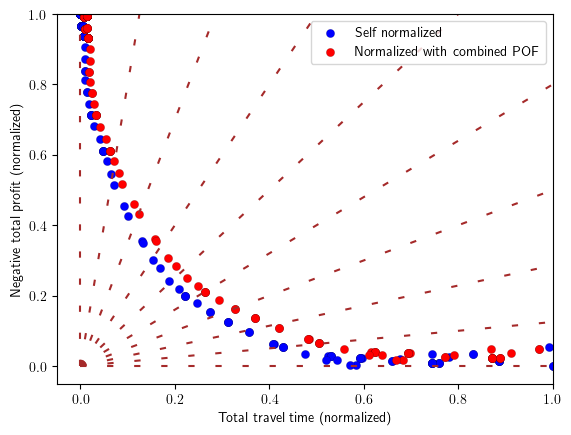

AM-PHN


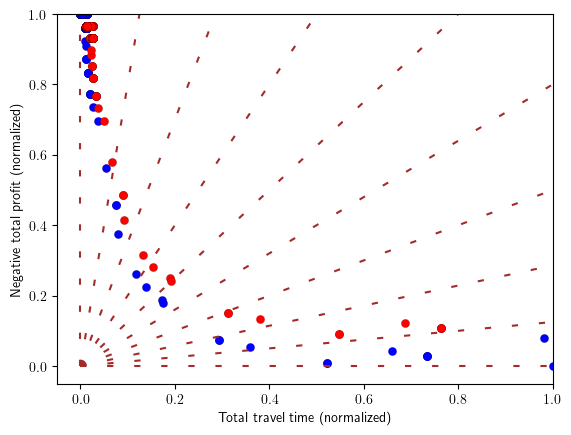

In [6]:
print("Plot the results. If points are not shown there are not in the non-dominated region.")

import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

# cmap = cm.get_cmap('tab10')

nd_size_df = pd.DataFrame()
nd_size_df["algorithms"] = participants
nd_size_list = []
problem = "eil76_n75_uncorr-similar-weights_05"
plt.figure(figsize=(5, 4))

full_F = None
for k, participant in enumerate(participants):
    _F = data[problem][participant]
    if full_F is None:
        full_F = _F
    else:
        full_F = np.concatenate([full_F, _F], axis=0)
I = fast_non_dominated_sort(full_F)[0]
nondom_full_F = full_F[I]
t_nadir, t_utopia = np.max(nondom_full_F, axis=0), np.min(nondom_full_F, axis=0)
t_diff = t_nadir-t_utopia

num_rays = 10
# S = np.arange(num_rays)*int(200/num_rays)
lines = []
for n in range(num_rays):
    a = n/(num_rays-1)
    b = 1-a
    lines += [np.asanyarray([[0,0],[a*100,b*100]])]
    
for k, participant in enumerate(participants):
    if "DRLMOA" in participant:
        continue
    print(participant)
    fig, ax = plt.subplots()
    _F = data[problem][participant]
    nadir, utopia = np.max(_F, axis=0), np.min(_F, axis=0)
    diff = nadir-utopia
    _N = (_F-utopia)/diff
    if len(_F.shape) == 1:
        _F = _F[np.newaxis, :]
    participant_label = participant_name_dict[participant]
#   participant_label = participant
    I = fast_non_dominated_sort(_F)[0]
    nondom_F = _F[I]
    nadir, utopia = np.max(nondom_F, axis=0), np.min(nondom_F, axis=0)
    diff = nadir-utopia
    _N = (_F-utopia)/diff
    gradient = np.linspace(0,1,len(_F))
    my_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors_list[k], N=len(_F))
#   print(len(_F))
    points = ax.scatter(_N[:,0], _N[:,1], edgecolors='black', linewidths=0.1, c="blue", label="Self normalized")
#     points = ax.scatter(_F[:,0], _F[:,1], c=gradient, edgecolors='black', linewidths=0.1, cmap=my_cmap, label=participant_label)
#     plt.scatter(nondom_F[:,0], nondom_F[:,1], c=gradient[I], edgecolors='black', linewidths=0.1, cmap=my_cmap, label=participant_label, marker=marker_list[k])
#     plt.scatter(_F[:,0], _F[:,1], label=participant_label, s=10, facecolors='none', edgecolors=cmap(
    ax.set_xlabel("Total travel time (normalized)")
    ax.set_ylabel("Negative total profit (normalized)")
#     plt.gcf()
#     plt.savefig("lambda_solution_plot_"+problem+"_"+participant+".jpg", dpi=200, bbox_inches='tight')
#     plt.show()
    
#     fig, ax = plt.subplots()
    t_N = (_F-t_utopia)/t_diff
    
    points = ax.scatter(t_N[:,0], t_N[:,1], edgecolors='black', linewidths=0.1, c="red", label="Normalized with combined POF")

#     points = ax.scatter(_F[:,0], _F[:,1], c=gradient, edgecolors='black', linewidths=0.1, cmap=my_cmap, label=participant_label)
#     plt.scatter(nondom_F[:,0], nondom_F[:,1], c=gradient[I], edgecolors='black', linewidths=0.1, cmap=my_cmap, label=participant_label, marker=marker_list[k])
#     plt.scatter(_F[:,0], _F[:,1], label=participant_label, s=10, facecolors='none', edgecolors=cmap(
#     ax.set_xlabel("Total travel time (normalized)")
#     ax.set_ylabel("Negative total profit (normalized)")
#     plt.gcf()
#     plt.savefig("lambda_solution_plot_"+problem+"_"+participant+".jpg", dpi=200, bbox_inches='tight')
    
    for line in lines:
        ax.plot(line[:,0], line[:,1], c="brown", linestyle='--', dashes=(3, 10))
    if k==0:
        plt.legend()
    ax.set_xlim(-0.05,1)
    ax.set_ylim(-0.05,1)
    plt.gcf()
    plt.savefig("lambda_norm_solution_plot_"+problem+"_"+participant+".jpg", dpi=200, bbox_inches='tight')

    
    plt.show()
    